In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

df=pd.read_csv(r'/Users/aditya/Internships/Apex Planet/ApexPlanet-Data-Analytics-Internship/Dataset/cleaned_retail_store_sales.csv')
df


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10,185.0,Digital Wallet,Online,2024-04-08,Yes
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9,261.0,Digital Wallet,Online,2023-07-23,Yes
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2,43.0,Credit Card,Online,2022-10-05,No
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9,247.5,Credit Card,Online,2022-05-07,No
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7,87.5,Digital Wallet,Online,2022-10-02,No
...,...,...,...,...,...,...,...,...,...,...,...
11357,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4,152.0,Credit Card,In-Store,2023-09-03,No
11358,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9,58.5,Cash,Online,2022-08-12,No
11359,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10,140.0,Cash,Online,2024-08-24,No
11360,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6,84.0,Cash,Online,2023-12-30,Yes


In [13]:
df.describe()


,Price Per Unit,Quantity,Total Spent
count,11362.000000,11362.000000,11362.000000
mean,23.356847,5.535029,129.642537
std,10.736030,2.855166,94.662368
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,52.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [5]:
total_revenue = df['Total Spent'].sum()
print(total_revenue)

1472998.5


In [6]:
total_revenue = df['Total Spent'].sum()
total_transactions = df.shape[0]

avg_order_value = total_revenue / total_transactions
print(avg_order_value)

129.64253652525963


In [14]:
df['Location'].value_counts()


Location
Online      5745
In-Store    5617
Name: count, dtype: int64

In [15]:
df['Category'].value_counts()


Category
Furniture                             1460
Electric Household Essentials         1437
Beverages                             1427
Food                                  1426
Milk Products                         1425
Butchers                              1421
Computers And Electric Accessories    1397
Patisserie                            1369
Name: count, dtype: int64

In [16]:
df['Payment Method'].value_counts()


Payment Method
Cash              3917
Credit Card       3729
Digital Wallet    3716
Name: count, dtype: int64

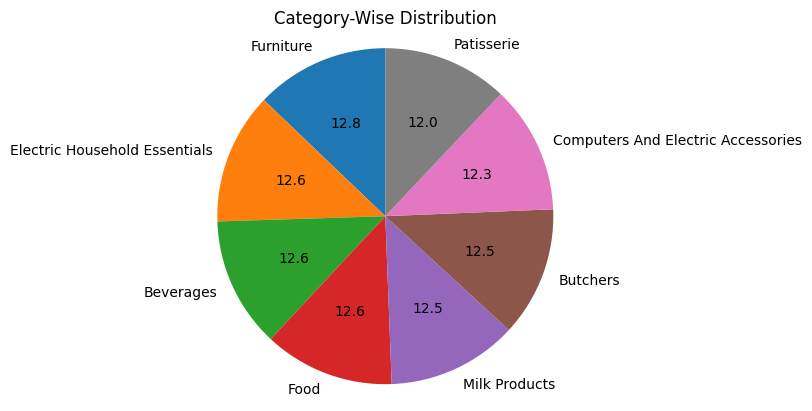

In [18]:
category_count=df['Category'].value_counts()
plt.figure()
plt.pie(category_count,
        labels=category_count.index,
        autopct='%1.1f',
        startangle=90)
plt.title("Category-Wise Distribution")
plt.axis("equal")
plt.show()

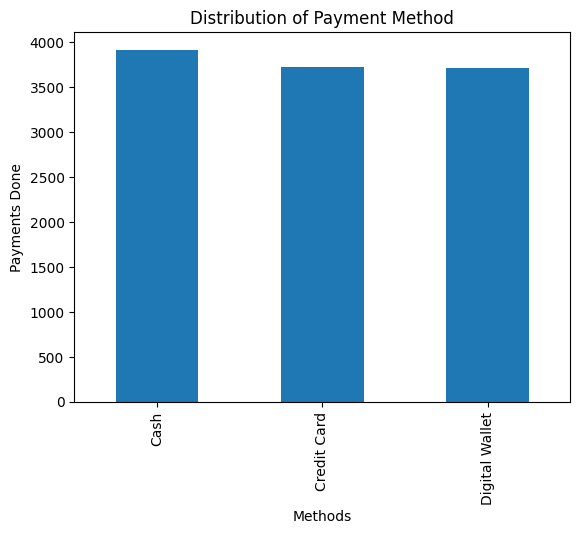

In [20]:
df['Payment Method'].value_counts().plot(kind='bar')
plt.title("Distribution of Payment Method")
plt.xlabel("Methods")
plt.ylabel("Payments Done")
plt.show()

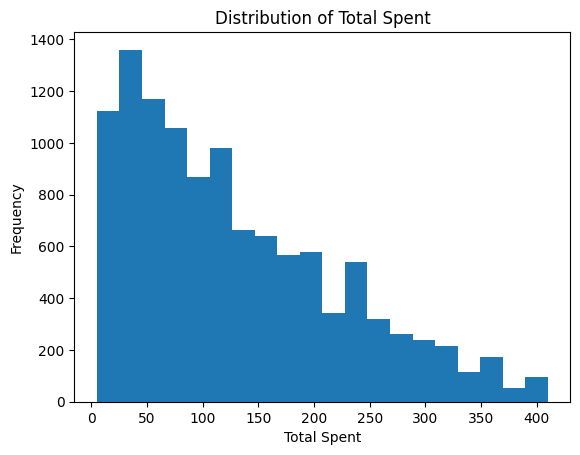

In [29]:
plt.hist(df['Total Spent'], bins=20)
plt.title("Distribution of Total Spent")
plt.xlabel("Total Spent")
plt.ylabel("Frequency")
plt.show()

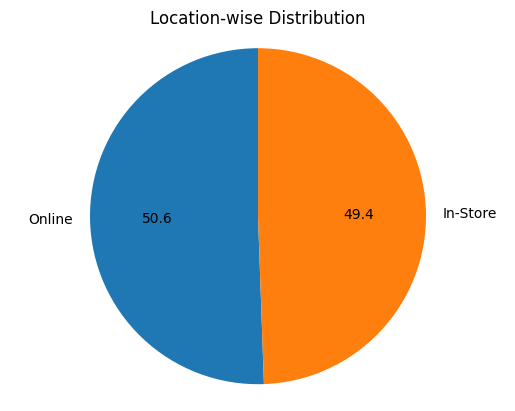

In [24]:
location_count=df['Location'].value_counts()
plt.figure()
plt.pie(location_count,
        labels=location_count.index,
        autopct='%1.1f',
        startangle=90)
plt.title("Location-wise Distribution")
plt.axis('equal')
plt.show()


In [ ]:
# Correlation insights

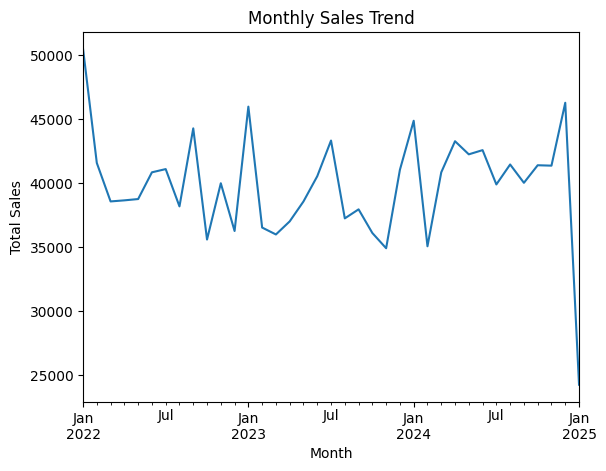

In [25]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

df.groupby(df['Transaction Date'].dt.to_period('M'))['Total Spent'].sum().plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


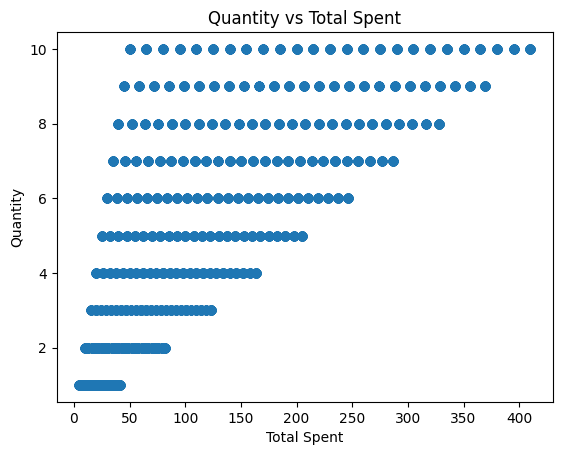

In [5]:
plt.scatter(df['Total Spent'],df['Quantity'])
plt.title("Quantity vs Total Spent")
plt.xlabel('Total Spent')
plt.ylabel('Quantity')
plt.show()

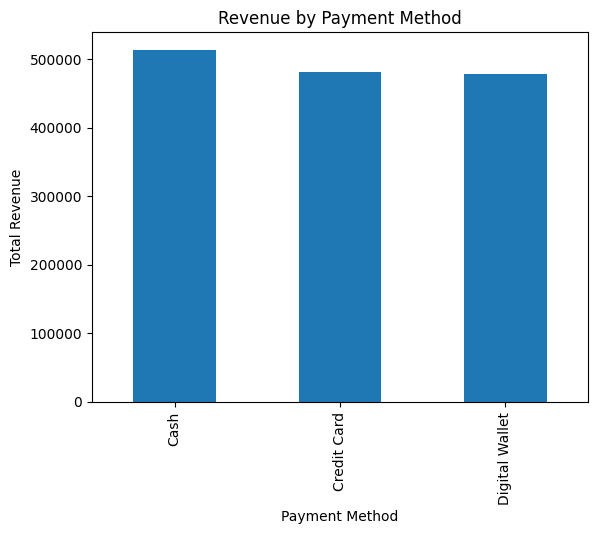

In [24]:
df.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.title('Revenue by Payment Method')
plt.show()


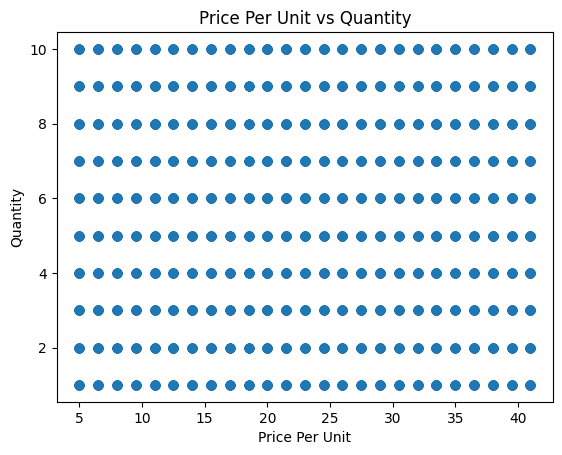

In [9]:
plt.scatter(df['Price Per Unit'],df['Quantity'])
plt.title("Price Per Unit vs Quantity")
plt.xlabel('Price Per Unit')
plt.ylabel('Quantity')
plt.show()

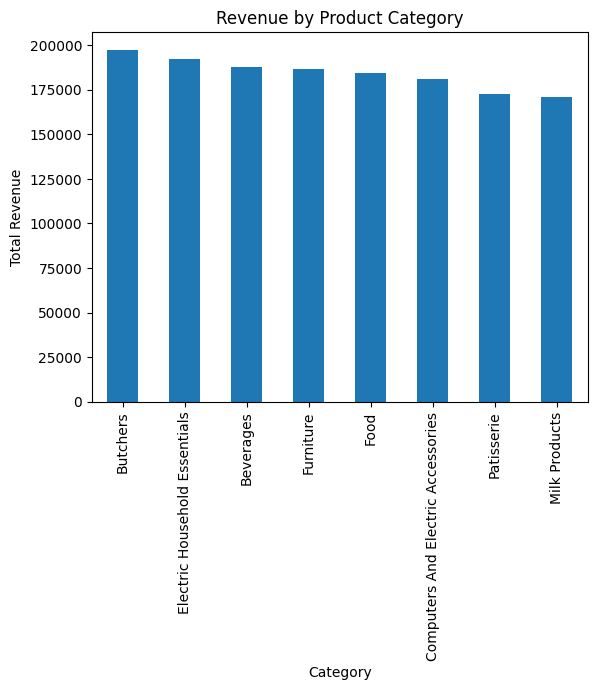

In [11]:
df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Revenue by Product Category')
plt.show()


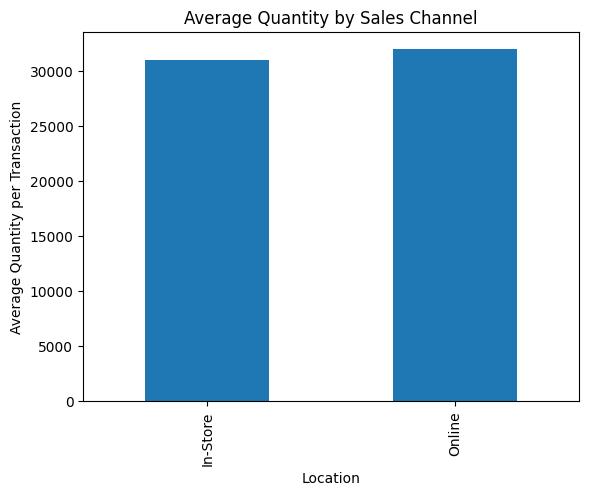

In [25]:
df.groupby('Location')['Quantity'].sum().plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Average Quantity per Transaction')
plt.title('Average Quantity by Sales Channel')
plt.show()


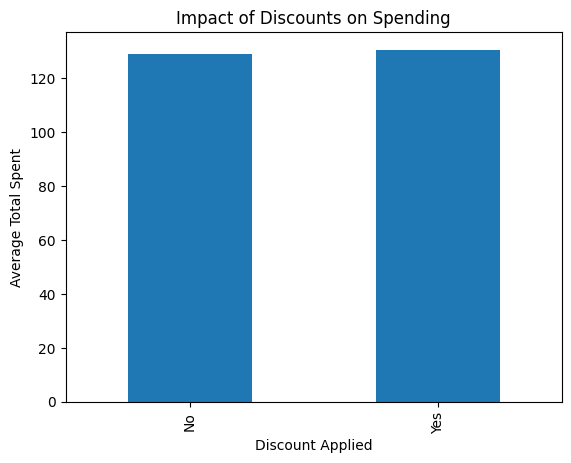

In [19]:
df.groupby('Discount Applied')['Total Spent'].mean().plot(kind='bar')
plt.xlabel('Discount Applied')
plt.ylabel('Average Total Spent')
plt.title('Impact of Discounts on Spending')
plt.show()


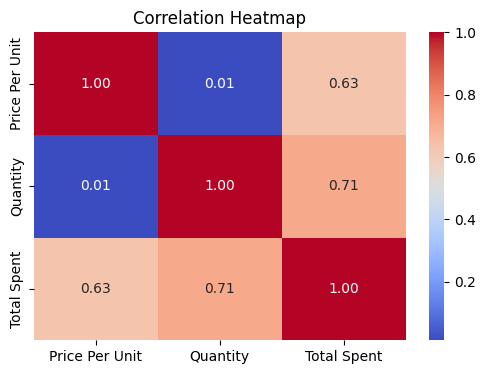

In [20]:
import seaborn as sns

corr_matrix = df[['Price Per Unit', 'Quantity', 'Total Spent']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


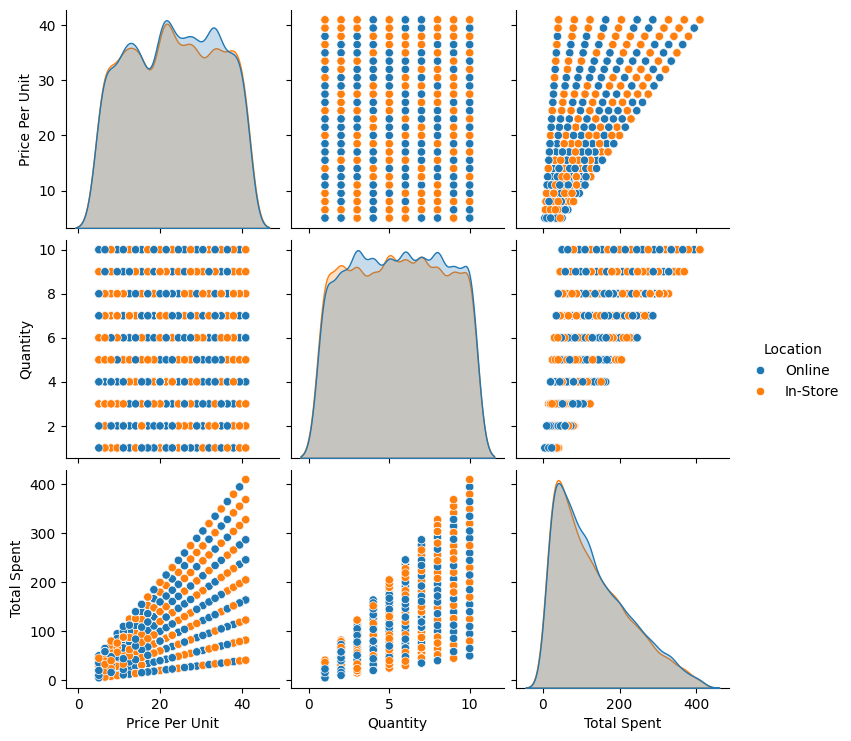

In [22]:
sns.pairplot(
    df[['Price Per Unit', 'Quantity', 'Total Spent', 'Location']],
    hue='Location'
)
plt.show()


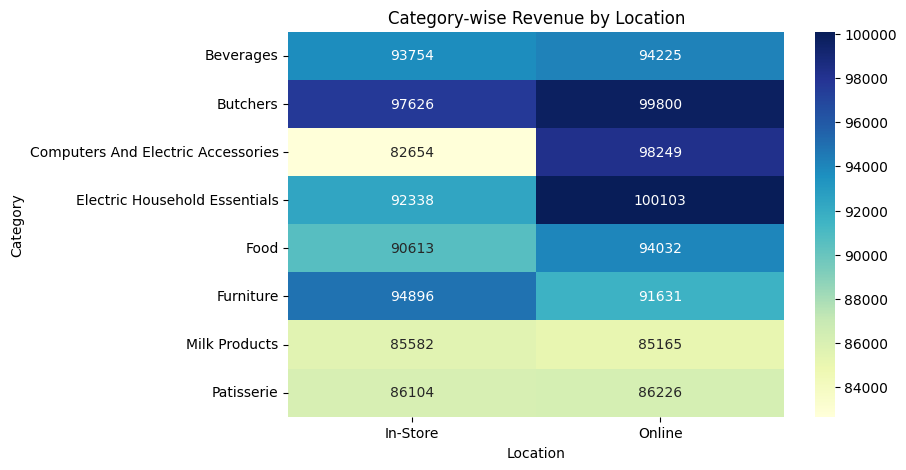

In [21]:
pivot_table = df.pivot_table(
    values='Total Spent',
    index='Category',
    columns='Location',
    aggfunc='sum'
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Category-wise Revenue by Location')
plt.show()
